In [85]:
from ab_rmsd import calc_DockQ
from ab_rmsd import calc_ab_rmsd

In [72]:
def get_pdb(pdb):
    return pdb.split('_')[0]+'.pdb'

def split_pdb(pdb):
    return pdb.split('/')[1]

def split_diff(pdb):
    return pdb.split('_')[0]+'.pdb'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
df=pd.read_csv('/public2022/tanwenchong/antibody/radb_nature.csv')
dfm=pd.read_csv('/public2022/tanwenchong/antibody/radb_dymean.csv')
dfa=pd.read_csv('/public2022/tanwenchong/antibody/radb_diffab.csv')
dfmm=pd.read_csv('/public2022/tanwenchong/antibody/multi_dymean.csv')
dfa['pdb']=dfa['pdb'].apply(get_pdb)
df=df.dropna(axis=0,how='any')
dfm=dfm.dropna(axis=0,how='any')
dfa=dfa.dropna(axis=0,how='any')
dfmm=dfmm.dropna(axis=0,how='any')

In [61]:
nature_Hchain['pdb']=nature_Hchain['Pdb'].apply(split_pdb)
nature_Hchain=nature_Hchain.drop(['Group','Pdb'],axis=1)
nature_I['pdb']=nature_I['Pdb'].apply(split_pdb)
nature_I=nature_I.drop(['Pdb','Group1','Group2','IntraclashesGroup1','IntraclashesGroup2'],axis=1)

diffab_Hchain['pdb']=diffab_Hchain['Pdb'].apply(split_pdb)
diffab_Hchain=diffab_Hchain.drop(['Group','Pdb'],axis=1)
diffab_I['pdb']=diffab_I['Pdb'].apply(split_pdb)
diffab_I=diffab_I.drop(['Pdb','Group1','Group2','IntraclashesGroup1','IntraclashesGroup2'],axis=1)


In [73]:
diffab_Hchain['pdb']=diffab_Hchain['pdb'].apply(split_diff)
diffab_I['pdb']=diffab_I['pdb'].apply(split_diff)
nature=pd.merge(nature_I,df,on='pdb')
nature=pd.merge(nature,nature_Hchain,on='pdb')
nature=nature.drop(['pdb'],axis=1)
nature=nature.dropna(axis=1,how='all')
diffab=pd.merge(diffab_I,dfa,on='pdb')
diffab=pd.merge(diffab,diffab_Hchain,on='pdb')
diffab=diffab.drop(['pdb'],axis=1)
diffab=diffab.dropna(axis=1,how='all')

In [74]:
diffab

Interaction Energy  Backbone Hbond_x  Sidechain Hbond_x  Van der Waals_x  \
0            81.161700         -2.219310          -12.05830        -24.55080   
1            -6.311370         -1.877010           -6.12096        -13.36790   
2             8.741610         -2.596890           -5.05897        -12.70790   
3            25.424600         -2.106550           -2.71661        -15.24110   
4            74.281300         -2.038840           -4.68560        -19.68170   
5           219.568000         -2.656220           -6.68174        -21.89180   
6            81.310900         -2.918770           -5.13827        -12.75340   
7            -0.914849         -1.448480           -2.62335         -7.68325   
8            17.036600         -0.098457           -2.80379        -13.01390   
9            -3.467240         -2.378390           -4.77828        -18.60850   
10           -1.585830         -5.692040          -12.66820        -19.04590   
11           51.274000         -6.715250           -7.99953        -18.52560   
12            7.223030         -2.242020           -2.62727        -21.63450   
13           55.278500         -1.393080           -6.48329        -15.76590   

    Electrostatics_x  Solvation Polar_x  Solvation Hydrophobic_x  \
0          -5.251010            41.3522                -29.42580   
1          -0.404690            17.4206                -16.03320   
2          -2.703290            23.1882                -12.85140   
3          -3.836510            26.7065                -17.01900   
4          -3.203100            29.7542                -23.43960   
5          -1.304360            38.6881                -24.63900   
6          -2.110610            26.1714                -14.98300   
7          -0.201261            11.4584                 -8.75489   
8          -5.089820            23.5766                -15.77340   
9          -2.485310            29.3492                -20.14670   
10         -1.440960            34.4474                -21.36570   
11         -7.847880            33.3533                -21.60000   
12         -5.094530            29.2989                -28.24940   
13          0.350279            28.2240                -17.85700   

    Van der Waals clashes_x  entropy sidechain_x  entropy mainchain_x  ...  \
0                 94.670900             12.71550              6.28167  ...   
1                  2.603650              5.62386              5.75880  ...   
2                 11.587100              8.19212              2.18762  ...   
3                 28.890300              5.69458              4.72118  ...   
4                 84.758000              6.42253              5.89144  ...   
5                216.094000              9.43898             10.19340  ...   
6                 80.725400              6.86875              4.92209  ...   
7                  0.869253              3.99140              3.35595  ...   
8                 20.341300              7.43364              2.58787  ...   
9                  3.936390              6.44547              5.36507  ...   
10                 9.241660             10.19960              4.72136  ...   
11                63.813300             10.07600              6.45382  ...   
12                23.845200              8.51770              4.07361  ...   
13                55.034800              5.58371              6.68162  ...   

   cis_bond_y torsional clash_y backbone clash_y  helix dipole_y  \
0     1.12406           3.71205          62.2750             0.0   
1     2.24811           9.40910          70.3360             0.0   
2     0.00000           8.44780          65.5575             0.0   
3     2.24811          13.97760          79.9811             0.0   
4     2.24811          10.03180          57.3544             0.0   
5     1.12406          27.96280          89.8180             0.0   
6     0.00000           9.68890          67.4134             0.0   
7     2.24811           4.05360          52.4956             0.0   

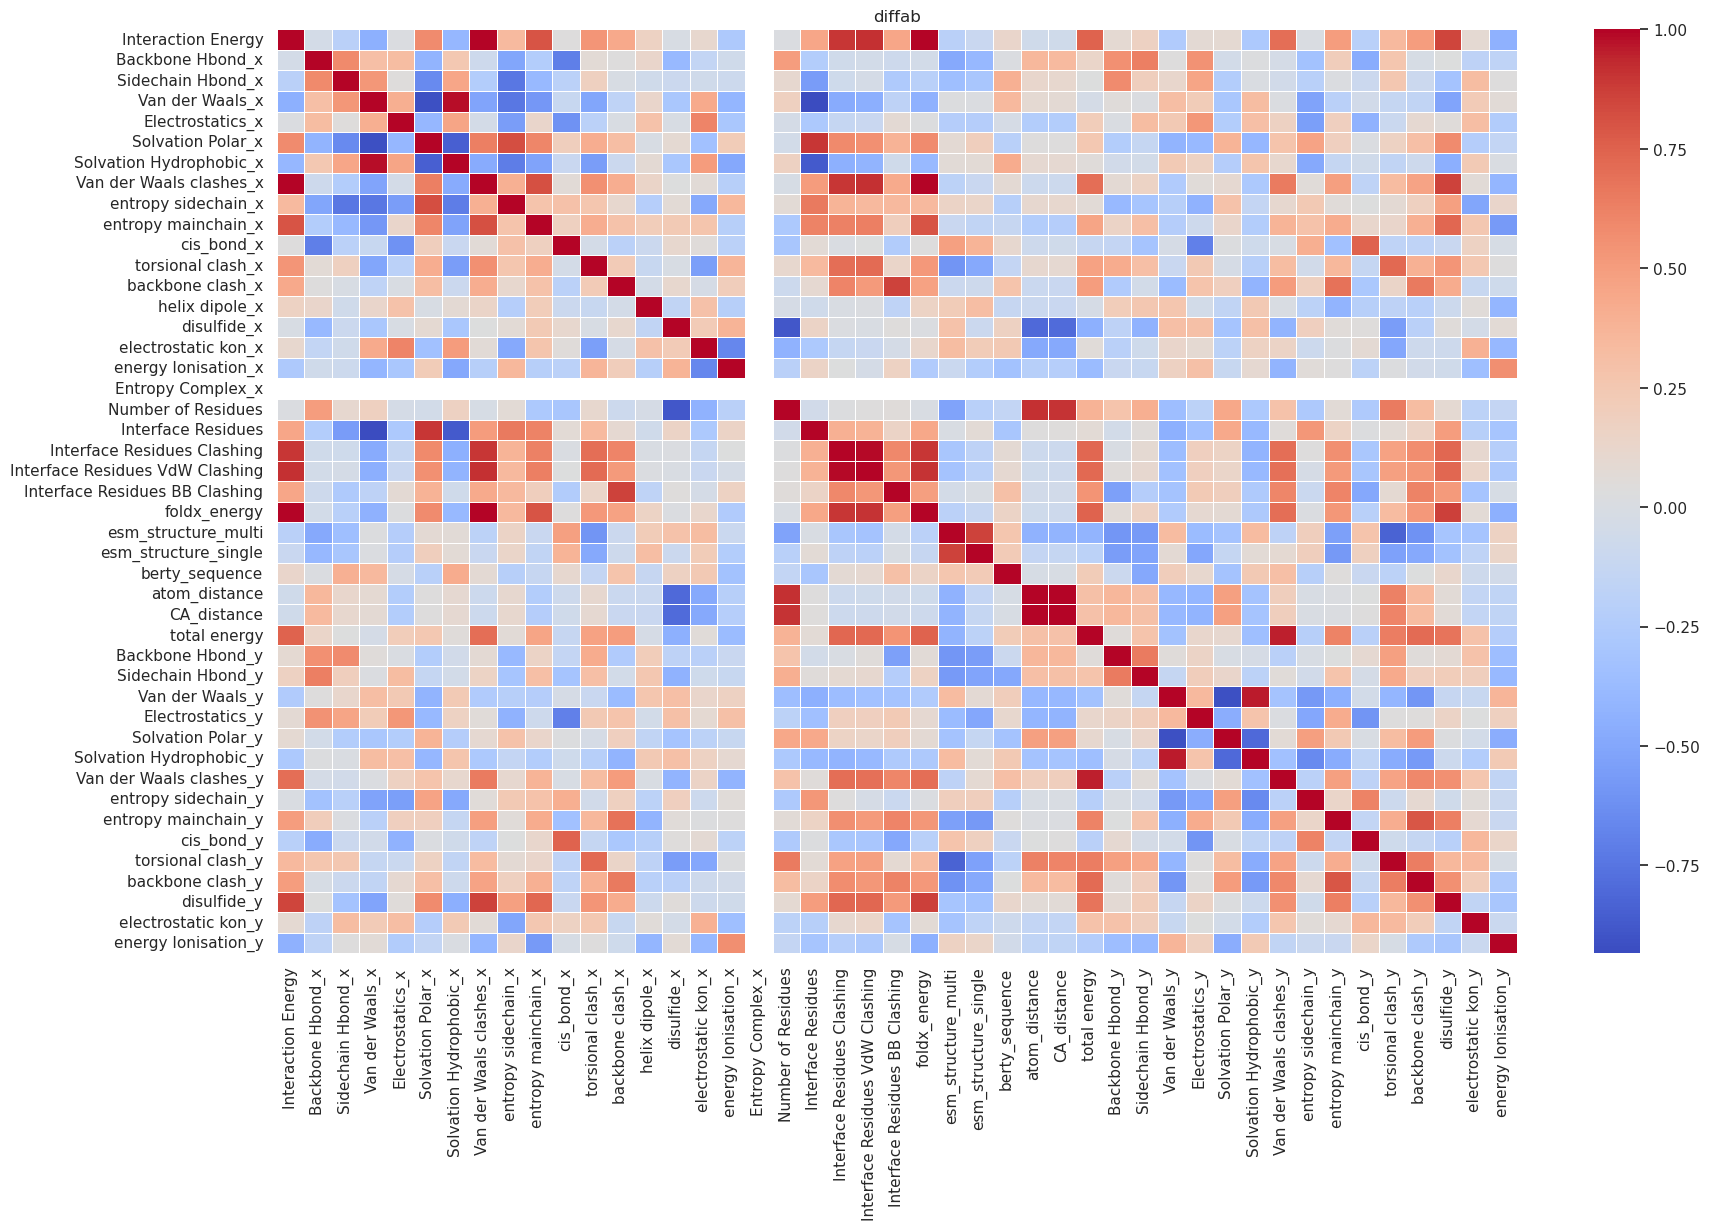

In [75]:
sns.set(style="white")  # 设置风格
plt.figure(figsize=(20, 12))  # 设置图形大小
sns.heatmap(diffab.loc[:, (diffab != 0).any(axis=0)].corr(), annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("diffab")
plt.savefig('/public2022/tanwenchong/antibody/benchmark/dymean_heatmap.png')


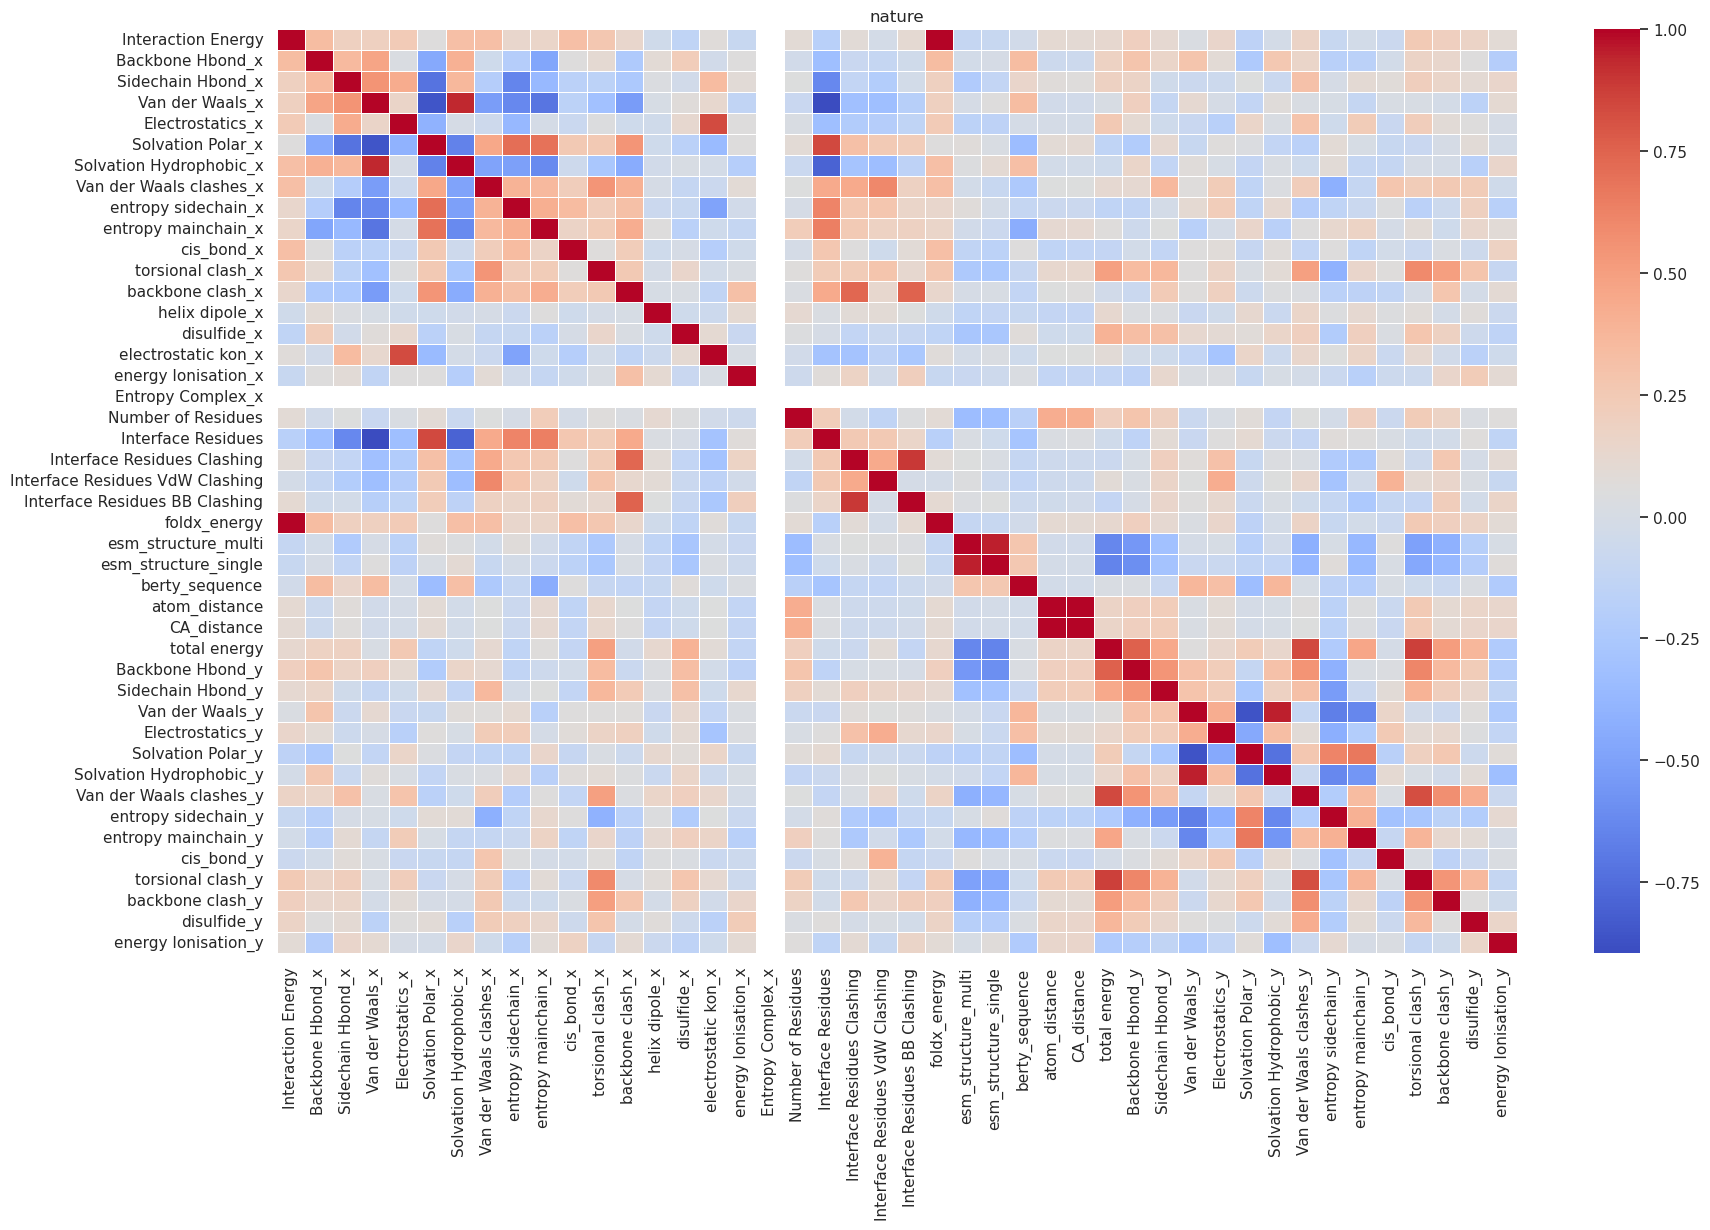

In [62]:
sns.set(style="white")  # 设置风格
plt.figure(figsize=(20, 12))  # 设置图形大小
sns.heatmap(nature.loc[:, (nature != 0).any(axis=0)].corr(), annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("nature")
plt.savefig('/public2022/tanwenchong/antibody/benchmark/nature_heatmap.png')


In [4]:
correlation_matrix = df[['foldx_energy','esm_structure_multi','esm_structure_single','berty_sequence','atom_distance','CA_distance']].corr()
correlation_matrixm = dfm[['foldx_energy','esm_structure_multi','esm_structure_single','berty_sequence','atom_distance','CA_distance']].corr()
correlation_matrixa = dfa[['foldx_energy','esm_structure_multi','esm_structure_single','berty_sequence','atom_distance','CA_distance']].corr()

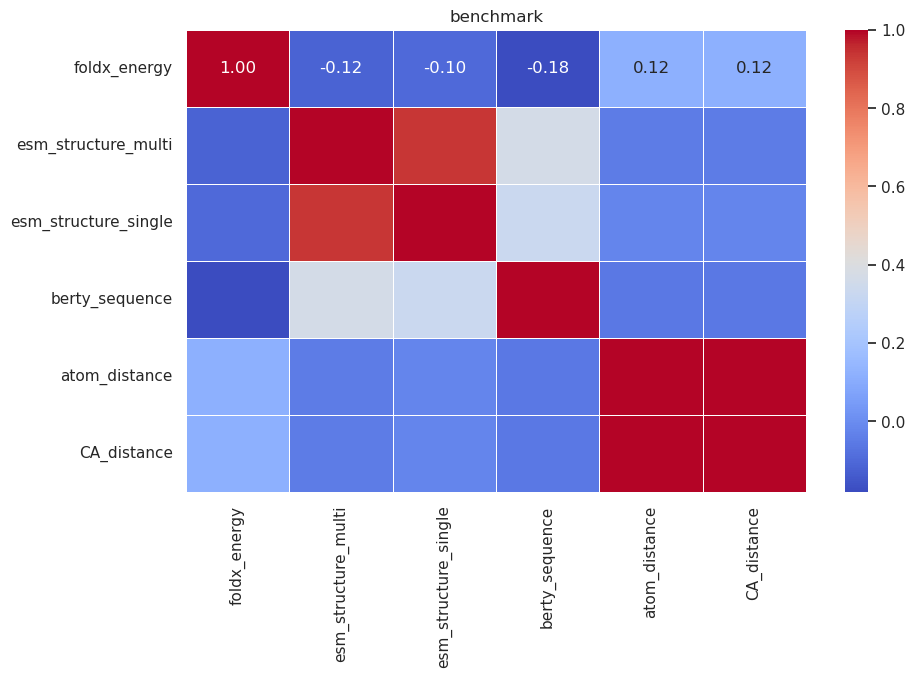

In [5]:
sns.set(style="white")  # 设置风格
plt.figure(figsize=(10, 6))  # 设置图形大小
sns.heatmap(correlation_matrixa, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("benchmark")
#plt.savefig('/public2022/tanwenchong/antibody/benchmark/heatmap.png')
plt.show()

In [6]:
def connect_dots(data, ax,n):
    for i in range(len(data[0])):
        x = [i for i in range(1,n+1)]  #多少列数据
        y = [data[d-1][i] for d in x]  #第几个数据
        ax.plot(x, y, color='gray', linestyle='-', linewidth=0.6, marker='o', markersize=2,alpha=0.5)

In [7]:
from math import ceil
def boxplot_sp(*args,**kwargs):
    fig, axes = plt.subplots(nrows=1, ncols=len(args[0].columns), figsize=(100, 5)) 
    for i, column in enumerate(args[0].columns):
        axes[i].boxplot([df[column] for df in args],labels=list(kwargs.values()))
        axes[i].set_title(column)
        connect_dots([df[column] for df in args], axes[i],len(args))                                                   

In [8]:
dfp=df[['foldx_energy','esm_structure_multi','esm_structure_single','berty_sequence','atom_distance','CA_distance']]
dfmp=dfm[['foldx_energy','esm_structure_multi','esm_structure_single','berty_sequence','atom_distance','CA_distance']]
dfap=dfa[['foldx_energy','esm_structure_multi','esm_structure_single','berty_sequence','atom_distance','CA_distance']]
dfmmp=dfmm[['foldx_energy','esm_structure_multi','esm_structure_single','berty_sequence','atom_distance','CA_distance']]
print(len(dfp),len(dfmp),len(dfap),len(dfmmp))

60 60 60 60


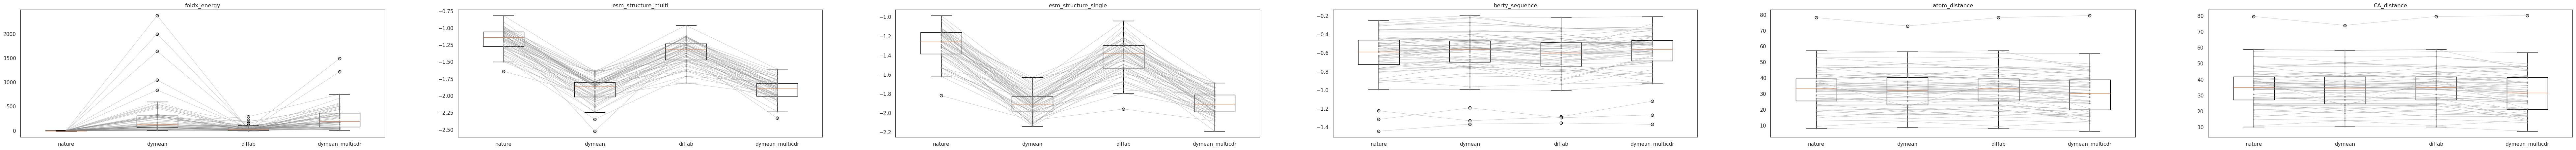

In [105]:
boxplot_sp(dfp,dfmp,dfap,dfmmp,a='nature',b='dymean',c='diffab',d='dymean_multicdr')
plt.savefig('/public2022/tanwenchong/antibody/benchmark/44box.png')

In [57]:
file_path='/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/benchmark/radb/Indiv_energies_1fe8_AC.fxout'
df_test = pd.read_csv(file_path,  skiprows=8, nrows=3, delimiter='\t')
df_test.columns

Index(['Pdb', 'Group', 'total energy', 'Backbone Hbond', 'Sidechain Hbond',
       'Van der Waals', 'Electrostatics', 'Solvation Polar',
       'Solvation Hydrophobic', 'Van der Waals clashes', 'entropy sidechain',
       'entropy mainchain', 'sloop_entropy', 'mloop_entropy', 'cis_bond',
       'torsional clash', 'backbone clash', 'helix dipole', 'water bridge',
       'disulfide', 'electrostatic kon', 'partial covalent bonds',
       'energy Ionisation', 'Entropy Complex'],
      dtype='object')

In [58]:
import os
import glob
import json

dymean_Hchain =pd.DataFrame(columns=df_test.columns)
with open('/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/benchmark/radb/summary.json', 'r') as fin:
    lines = fin.read().strip().split('\n')
    for line in lines:
        item = json.loads(line)
        pdb=item["pdb"] #item["heavy_chain"]
        file_path=f"/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/benchmark/radb/Indiv_energies_{pdb}_AC.fxout"
        H=pd.read_csv(file_path,  skiprows=8, nrows=3, delimiter='\t')
        H=H[H['Group']==item['heavy_chain']]
        dymean_Hchain= pd.concat([dymean_Hchain,H],ignore_index=True)
    

dymulti_Hchain =pd.DataFrame(columns=df_test.columns)
with open('/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/benchmark/radb/summary.json', 'r') as fin:
    lines = fin.read().strip().split('\n')
    for line in lines:
        item = json.loads(line)
        pdb=item["pdb"] #item["heavy_chain"]
        file_path=f"/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/benchmark/radb_multi/Indiv_energies_{pdb}_AC.fxout"
        H=pd.read_csv(file_path,  skiprows=8, nrows=3, delimiter='\t')
        H=H[H['Group']==item['heavy_chain']]
        dymulti_Hchain= pd.concat([dymulti_Hchain,H],ignore_index=True)   

nature_Hchain=pd.DataFrame(columns=df_test.columns)
with open('/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/all_data/rabd_all.json', 'r') as fin:
    lines = fin.read().strip().split('\n')
    for line in lines:
        item = json.loads(line)
        pdb=item["pdb"] #item["heavy_chain"]
        file_path=f"/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/all_data/pdb/Indiv_energies_{pdb}_AC.fxout"
        H=pd.read_csv(file_path,  skiprows=8, nrows=3, delimiter='\t')
        H=H[H['Group']== f"{item['heavy_chain']}{item['light_chain']}"]
        nature_Hchain= pd.concat([nature_Hchain,H],ignore_index=True)    

diffab_Hchain=pd.DataFrame(columns=df_test.columns)
with open('/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/all_data/rabd_all.json', 'r') as fin:
    lines = fin.read().strip().split('\n')
    for line in lines:
        item = json.loads(line)
        pdb=item["pdb"] #item["heavy_chain"]
        file_path=f"/public2022/tanwenchong/antibody/diffab-main/benchmark/radb/Indiv_energies_{pdb}_generated_AC.fxout"
        H=pd.read_csv(file_path,  skiprows=8, nrows=3, delimiter='\t')
        H=H[H['Group']== f"{item['heavy_chain']}{item['light_chain']}"]
        diffab_Hchain= pd.concat([diffab_Hchain,H],ignore_index=True) 

diffmulti_Hchain=pd.DataFrame(columns=df_test.columns)
with open('/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/all_data/rabd_all.json', 'r') as fin:
    lines = fin.read().strip().split('\n')
    for line in lines:
        item = json.loads(line)
        pdb=item["pdb"] #item["heavy_chain"]
        file_path=f"/public2022/tanwenchong/antibody/diffab-main/benchmark/radb_multi/Indiv_energies_{pdb}_AC.fxout"
        H=pd.read_csv(file_path,  skiprows=8, nrows=3, delimiter='\t')
        H=H[H['Group']==item['heavy_chain']]
        diffmulti_Hchain= pd.concat([diffmulti_Hchain,H],ignore_index=True) 

/tmp/ipykernel_84273/1616004043.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  nature_Hchain= pd.concat([nature_Hchain,H],ignore_index=True)
/tmp/ipykernel_84273/1616004043.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diffab_Hchain= pd.concat([diffab_Hchain,H],ignore_index=True)


In [11]:
nature_Hchain=nature_Hchain.drop(['Group','Pdb'],axis=1)
dymean_Hchain=dymean_Hchain.drop(['Group','Pdb'],axis=1)
dymulti_Hchain=dymulti_Hchain.drop(['Group','Pdb'],axis=1)
diffab_Hchain=diffab_Hchain.drop(['Group','Pdb'],axis=1)
diffmulti_Hchain=diffmulti_Hchain.drop(['Group','Pdb'],axis=1)
nature_Hchain=nature_Hchain.dropna(axis=0,how='any')
dymean_Hchain=dymean_Hchain.dropna(axis=0,how='any')
dymulti_Hchain=dymulti_Hchain.dropna(axis=0,how='any')
diffab_Hchain=diffab_Hchain.dropna(axis=0,how='any')
diffmulti_Hchain=diffmulti_Hchain.dropna(axis=0,how='any')

In [19]:
boxplot_sp(dymean_Hchain,dymulti_Hchain,nature_Hchain,diffab_Hchain,diffmulti_Hchain,b='dymean',c='dymulti',a='nature',d='diffab',e='diffmulti')
plt.savefig('/public2022/tanwenchong/antibody/benchmark/new_hchain_box.png')

In [59]:
file_path='/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/benchmark/radb/Interaction_1a14_AC.fxout'
df_test = pd.read_csv(file_path,  skiprows=8, nrows=2, delimiter='\t')


In [60]:
import os
import glob
import json

dymean_I =pd.DataFrame(columns=df_test.columns)
with open('/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/benchmark/radb/summary.json', 'r') as fin:
    lines = fin.read().strip().split('\n')
    for line in lines:
        item = json.loads(line)
        pdb=item["pdb"] #item["heavy_chain"]
        file_path=f"/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/benchmark/radb/Interaction_{pdb}_AC.fxout"
        H=pd.read_csv(file_path,  skiprows=8, nrows=2, delimiter='\t')
        dymean_I= pd.concat([dymean_I,H],ignore_index=True)
    

dymulti_I=pd.DataFrame(columns=df_test.columns)
with open('/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/benchmark/radb/summary.json', 'r') as fin:
    lines = fin.read().strip().split('\n')
    for line in lines:
        item = json.loads(line)
        pdb=item["pdb"] #item["heavy_chain"]
        file_path=f"/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/benchmark/radb_openmm/Interaction_{pdb}_AC.fxout"
        H=pd.read_csv(file_path,  skiprows=8, nrows=2, delimiter='\t')
        dymulti_I= pd.concat([dymulti_I,H],ignore_index=True)   

nature_I=pd.DataFrame(columns=df_test.columns)
with open('/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/all_data/rabd_all.json', 'r') as fin:
    lines = fin.read().strip().split('\n')
    for line in lines:
        item = json.loads(line)
        pdb=item["pdb"] #item["heavy_chain"]
        file_path=f"/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/all_data/pdb/Interaction_{pdb}_AC.fxout"
        H=pd.read_csv(file_path,  skiprows=8, nrows=2, delimiter='\t')
        nature_I= pd.concat([nature_I,H],ignore_index=True)    

diffab_I=pd.DataFrame(columns=df_test.columns)
with open('/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/all_data/rabd_all.json', 'r') as fin:
    lines = fin.read().strip().split('\n')
    for line in lines:
        item = json.loads(line)
        pdb=item["pdb"] #item["heavy_chain"]
        file_path=f"/public2022/tanwenchong/antibody/diffab-main/benchmark/radb/Interaction_{pdb}_generated_AC.fxout"
        H=pd.read_csv(file_path,  skiprows=8, nrows=2, delimiter='\t')
        diffab_I= pd.concat([diffab_I,H],ignore_index=True) 

diffmulti_I=pd.DataFrame(columns=df_test.columns)
with open('/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/all_data/rabd_all.json', 'r') as fin:
    lines = fin.read().strip().split('\n')
    for line in lines:
        item = json.loads(line)
        pdb=item["pdb"] #item["heavy_chain"]
        file_path=f"/public2022/tanwenchong/antibody/diffab-main/benchmark/radb_multi/Interaction_{pdb}_AC.fxout"
        H=pd.read_csv(file_path,  skiprows=8, nrows=2, delimiter='\t')
        diffmulti_I= pd.concat([diffmulti_I,H],ignore_index=True) 

/tmp/ipykernel_84273/1039056483.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dymean_I= pd.concat([dymean_I,H],ignore_index=True)
/tmp/ipykernel_84273/1039056483.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dymulti_I= pd.concat([dymulti_I,H],ignore_index=True)
/tmp/ipykernel_84273/1039056483.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determin

In [18]:
nature_I=nature_I.drop(['Pdb','Group1','Group2','IntraclashesGroup1','IntraclashesGroup2'],axis=1)
dymean_I=dymean_I.drop(['Pdb','Group1','Group2','IntraclashesGroup1','IntraclashesGroup2'],axis=1)
dymulti_I=dymulti_I.drop(['Pdb','Group1','Group2','IntraclashesGroup1','IntraclashesGroup2'],axis=1)
diffab_I=diffab_I.drop(['Pdb','Group1','Group2','IntraclashesGroup1','IntraclashesGroup2'],axis=1)
diffmulti_I=diffmulti_I.drop(['Pdb','Group1','Group2','IntraclashesGroup1','IntraclashesGroup2'],axis=1)
nature_I=nature_I.dropna(axis=0,how='any')
dymean_I=dymean_I.dropna(axis=0,how='any')
dymulti_I=dymulti_I.dropna(axis=0,how='any')
diffab_I=diffab_I.dropna(axis=0,how='any')
diffmulti_I=diffmulti_I.dropna(axis=0,how='any')

In [11]:
boxplot_sp(dymean_I,dymulti_I,nature_I,diffab_I,diffmulti_I,b='dy',c='dymulti',a='nature',d='diff',e='diffmulti')
plt.savefig('/public2022/tanwenchong/antibody/benchmark/inter_box.png')

In [116]:
import json
pdb_path=dict()
with open('/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/all_data/rabd_all.json', 'r') as fin:
    lines = fin.read().strip().split('\n')
    for line in lines:
        item = json.loads(line)
        pdb_path[item["pdb"]]=item["pdb_data_path"]
        

In [117]:
rmsd_dymean =pd.DataFrame(columns=['CDRH1','CDRH2','CDRH3','fv-H','CDRL1','CDRL2','CDRL3','fv-L'])
with open('/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/benchmark/radb/summary.json', 'r') as fin:
    lines = fin.read().strip().split('\n')
    os.chdir('/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/benchmark/radb')
    for line in lines:
        item = json.loads(line)
        pdb=item["pdb"]
        design_pdb=pdb+'.pdb'
        rmsd = calc_ab_rmsd(pdb_path[pdb],design_pdb)
        df = pd.DataFrame(rmsd, index=[pdb])
        rmsd_dymean=pd.concat([rmsd_dymean,df])

rmsd_diffab =pd.DataFrame(columns=['CDRH1','CDRH2','CDRH3','fv-H','CDRL1','CDRL2','CDRL3','fv-L'])
with open('/public2022/tanwenchong/antibody/dyMEAN/dyMEAN-main/benchmark/radb/summary.json', 'r') as fin:
    lines = fin.read().strip().split('\n')
    os.chdir('/public2022/tanwenchong/antibody/diffab-main/benchmark/radb')
    for line in lines:
        item = json.loads(line)
        pdb=item["pdb"]
        design_pdb=pdb+'_generated.pdb'
        try:
            rmsd = calc_ab_rmsd(pdb_path[pdb],design_pdb)
            df = pd.DataFrame(rmsd, index=[pdb])
            rmsd_diffab=pd.concat([rmsd_diffab,df])
        except:
            continue

[INFO] Chain A does not contain valid Fv: Variable chain sequence not recognized: "RTYTLADYLKNTFRVKSYSLRWVSDSEYLYKQENNILLFNAEHGNSSIFLENSTFEIFGDSISDYSVSPDRLFVLLEYNYVKQWRHSYTASYSIYDLNKRQLITEEKIPNNTQWITWSQEGHKLAYVWKNDIYVKIEPHLPSHRITSTGKENVIFNGINDWVYEEEIFGAYSALWWSPNGTFLAYAQFNDTGVPLIEYSFYSDESLQYPKTVWIPYPKAGAVNPTVKFFIVNTDSLSSTTTTIPMQITAPASVTTGDHYLCDVAWVSEDRISLQWLRRIQNYSVMAICDYDKTTLVWNCPTTQEHIETSATGWCGRFRPAEPHFTSDGSSFYKIVSDKDGYKHICQFQKDRKPEQVCTFITKGAWEVISIEALTSDYLYYISNEYKEMPGGRNLYKIQLTDHTNKKCLSCDLNPERCQYYSVSLSKEAKYYQLGCRGPGLPLYTLHRSTDQKELRVLEDNSALDKMLQDVQMPSKKLDFIVLNETRFWYQMILPPHFDKSKKYPLLIDVYAGPCSQKADAAFRLNWATYLASTENIIVASFDGRGSGYQGDKIMHAINKRLGTLEVEDQIEAARQFLKMGFVDSKRVAIWGWSYGGYVTSMVLGSGSGVFKCGIAVAPVSRWEYYDSVYTERYMGLPTPEDNLDHYRNSTVMSRAENFKQVEYLLIHGTADDNVHFQQSAQISKALVDAGVDFQAMWYTDEDHGIASSTAHQHIYSHMSHFLQQCFS"
[INFO] Chain A does not contain valid Fv: Variable chain sequence not recognized: "RTYTLADYLKNTFRVKSYSLRWVSDSEYLYKQENNILLFNAEHGNSSIFLENSTFEIFGDSISDYSVSPDRLFVLLEYNYVKQWRHSYTASYSIYDLNKRQLITE

/tmp/ipykernel_49093/3502366326.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rmsd_dymean=pd.concat([rmsd_dymean,df])


[INFO] Chain D does not contain valid Fv: Variable chain sequence not recognized: "GPNICTTRGVSSCQQCLAVSPMCAWCSDEALPLGSPRCDLKENLLKDNCAPESIEFPVSEARVLEDRPLSDKGSGDSSQVTQVSPQRIALRLRPDDSKNFSIQVRQVEDYPVDIYYLMDLSYSMKDDLWSIQNLGTKLATQMRKLTSNLRIGFGAFVDKPVSPYMYISPPEALENPCYDMKTTCLPMFGYKHVLTLTDQVTRFNEEVKKQSVSRNRDAPEGGFDAIMQATVCDEKIGWRNDASHLLVFTTDAKTHIALDGRLAGIVQPNDGQCHVGSDNHYSASTTMDYPSLGLMTEKLSQKNINLIFAVTENVVNLYQNYSELIPGTTVGVLSMDSSNVLQLIVDAYGKIRSKVELEVRDLPEELSLSFNATCLNNEVIPGLKSCMGLKIGDTVSFSIEAKVRGCPQEKEKSFTIKPVGFKDSLIVQVTFDCDCACQAQAEPNSHRCNNGNGTFECGVCRCGPGWLGSQC"
[INFO] Chain A does not contain valid Fv: Variable chain sequence not recognized: "LNLDPVQLTFYAGPNGSQFGFSLDFHKDSHGRVAIVVGAPRTLGPSQEETGGVFLCPWRAEGGQCPSLLFDLRDETRNVGSQTLQTFKARQGLGASVVSWSDVIVACAPWQHWNVLEKTEEAEKTPVGSCFLAQPESGRRAEYSPCRGNTLSRIYVENDFSWDKRYCEAGFSSVVTQAGELVLGAPGGYYFLGLLAQAPVADIFSSYRPGILLWHVSSQSLSFDSSNPEYFDGYWGYSVAVGEFDGDLNTTEYVVGAPTWSWTLGAVEILDSYYQRLHRLRGEQMASYFGHSVAVTDVNGDGRHDLLVGAPLYMESRADRKLAEVGRVYLFLQPRGPHALGAPSLLLTGTQLYGRFGSAIA

/tmp/ipykernel_49093/3502366326.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rmsd_diffab=pd.concat([rmsd_diffab,df])


[INFO] Chain D does not contain valid Fv: Variable chain sequence not recognized: "GPNICTTRGVSSCQQCLAVSPMCAWCSDEALPLGSPRCDLKENLLKDNCAPESIEFPVSEARVLEDRPLSDKGSGDSSQVTQVSPQRIALRLRPDDSKNFSIQVRQVEDYPVDIYYLMDLSYSMKDDLWSIQNLGTKLATQMRKLTSNLRIGFGAFVDKPVSPYMYISPPEALENPCYDMKTTCLPMFGYKHVLTLTDQVTRFNEEVKKQSVSRNRDAPEGGFDAIMQATVCDEKIGWRNDASHLLVFTTDAKTHIALDGRLAGIVQPNDGQCHVGSDNHYSASTTMDYPSLGLMTEKLSQKNINLIFAVTENVVNLYQNYSELIPGTTVGVLSMDSSNVLQLIVDAYGKIRSKVELEVRDLPEELSLSFNATCLNNEVIPGLKSCMGLKIGDTVSFSIEAKVRGCPQEKEKSFTIKPVGFKDSLIVQVTFDCDCACQAQAEPNSHRCNNGNGTFECGVCRCGPGWLGSQC"
[INFO] Chain D does not contain valid Fv: Variable chain sequence not recognized: "GPNICTTRGVSSCQQCLAVSPMCAWCSDEALPLGSPRCDLKENLLKDNCAPESIEFPVSEARVLEDRPLSDKGSGDSSQVTQVSPQRIALRLRPDDSKNFSIQVRQVEDYPVDIYYLMDLSYSMKDDLWSIQNLGTKLATQMRKLTSNLRIGFGAFVDKPVSPYMYISPPEALENPCYDMKTTCLPMFGYKHVLTLTDQVTRFNEEVKKQSVSRNRDAPEGGFDAIMQATVCDEKIGWRNDASHLLVFTTDAKTHIALDGRLAGIVQPNDGQCHVGSDNHYSASTTMDYPSLGLMTEKLSQKNINLIFAVTENVVNLYQNYSELIPGTTVGVLSMDSSNVLQLIVDAYGKIRSKVELEVRD

In [118]:
len(rmsd_diffab)

60

In [119]:
rmsd_dymean=rmsd_dymean.dropna(axis=0,how='any')
rmsd_diffab=rmsd_diffab.dropna(axis=0,how='any')

/tmp/ipykernel_49093/1316304222.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [data[d-1][i] for d in x]  #第几个数据
/tmp/ipykernel_49093/1316304222.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [data[d-1][i] for d in x]  #第几个数据
/tmp/ipykernel_49093/1316304222.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [data[d-1][i] for d in x]  #第几个数据
/tmp/ipykernel_49093/1316304222.py:4: FutureWarning: Series.__getitem_

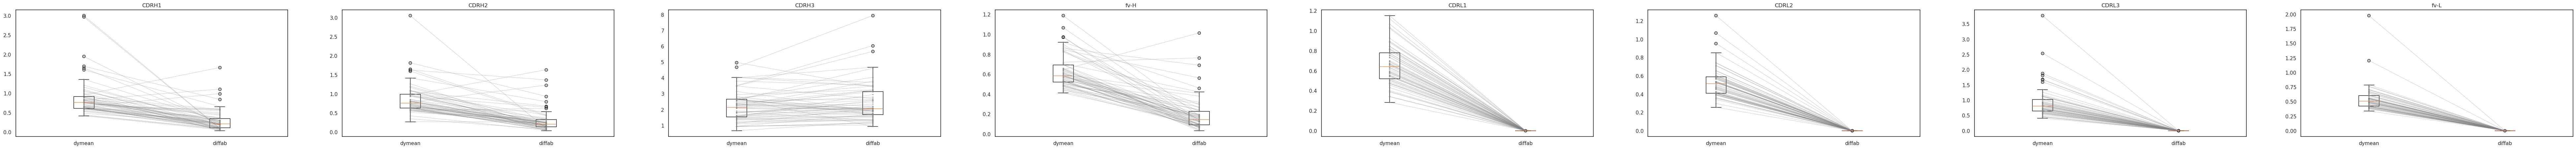

In [120]:
boxplot_sp(rmsd_dymean,rmsd_diffab,a='dymean',b='diffab')

In [100]:
a='1,2,3,4'.split(',')

In [101]:
a

['1', '2', '3', '4']